In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Chapter 3: Analytic Geometry

In Chapter 2, we studied vectors, vector spaces, and linear mappings at a general but abstract level. In this chapter, we will add some geometric interpretation and intuition to all of these concepts. In particular, we will look at geometric vectors and compute their lengths and distances or angles between two vectors. To be able to do this, we equip the vector space with an inner product that induces the geometry of the vector space. Inner products and their corresponding norms and metrics capture the intuitive notions of similarity and distances, which we use to develop the support vector machine in Chapter 12. We will then use the concepts of lengths and angles between vectors to discuss orthogonal projections, which will play a central role when we discuss principal component analysis in Chapter 10 and regression via maximum likelihood estimation in Chapter 9. 

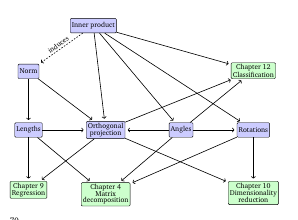

Figure 3.1 gives an overview of how concepts in this chapter are related and how they are connected to other chapters of the book.

## Overview of Concepts and Connections

- **Inner Product**: Induces the geometry of the vector space.
- **Norm**: Captures distances, used in Chapter 12 for classification (Support Vector Machine).
- **Lengths and Angles**: Used to define orthogonal projections.
- **Orthogonal Projection**: Central to:
  - Chapter 9: Regression (via maximum likelihood estimation).
  - Chapter 10: Dimensionality reduction (Principal Component Analysis).
- **Rotations**: Connected to Chapter 4 (Matrix Decomposition).
## Figure 3.3

For different norms, the red lines indicate the set of vectors with norm 1.

- **Left**: Manhattan norm
- **Right**: Euclidean distance

## 3.1 Norms

When we think of geometric vectors, i.e., directed line segments that start at the origin, then intuitively the length of a vector is the distance of the “end” of this directed line segment from the origin. In the following, we will discuss the notion of the length of vectors using the concept of a norm.

### Definition 3.1 (Norm)

A norm on a vector space $ V $ is a function

$$
\text{norm} \ \|\cdot\| : V \to \mathbb{R}, \tag{3.1}
$$

$$
x \mapsto \|x\|, \tag{3.2}
$$

which assigns each vector $ x $ its length $ \|x\| \in \mathbb{R} $, such that for all $ \lambda \in \mathbb{R} $ and $ x, y \in V $ the following hold:

- **Absolutely homogeneous**: $ \|\lambda x\| = |\lambda| \|x\| $
- **Triangle inequality**: $ \|x + y\| \leq \|x\| + \|y\| $
- **Positive definite**: $ \|x\| \geq 0 $ and $ \|x\| = 0 \iff x = 0 $

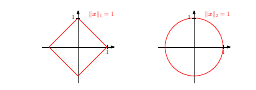
Fig.3 For different norms, the red lines indicate the set of vectors with norm 1. Left: Manhattan norm; Right: Euclidean distance.

### Fig.2: Triangle Inequality

In geometric terms, the triangle inequality states that for any triangle, the sum of the lengths of any two sides must be greater than or equal to the length of the remaining side; see Figure 3.2 for an illustration.

$$
c \leq a + b
$$

Definition 3.1 is in terms of a general vector space $ V $ (Section 2.4), but in this book we will only consider a finite-dimensional vector space $ \mathbb{R}^n $. Recall that for a vector $ x \in \mathbb{R}^n $ we denote the elements of the vector using a subscript, that is, $ x_i $ is the $ i $th element of the vector $ x $.

### Example 3.1 (Manhattan Norm)

The Manhattan norm on $ \mathbb{R}^n $ is defined for $ x \in \mathbb{R}^n $ as

$$
\|x\|_1 := \sum_{i=1}^n |x_i|, \tag{3.3}
$$

where $ | \cdot | $ is the absolute value. The left panel of Figure 3.3 shows all vectors $ x \in \mathbb{R}^2 $ with $ \|x\|_1 = 1 $. The Manhattan norm is also called $ \ell_1 $ norm.


In [2]:
import random
import math

# Seed for reproducibility
random.seed(42)

# --- Manhattan Norm Implementation ---
def manhattan_norm(x):
    """
    Compute the Manhattan (l1) norm of a vector x in R^n.
    ||x||_1 = sum |x_i|
    """
    return sum(abs(xi) for xi in x)

# --- Verify Norm Properties ---
def verify_norm_properties():
    # Test vectors in R^2
    x = [1.0, 2.0]
    y = [0.5, -1.0]
    lambda_scalar = 2.0
    zero_vector = [0.0, 0.0]

    # 1. Absolute Homogeneity: ||lambda * x|| = |lambda| * ||x||
    norm_x = manhattan_norm(x)
    scaled_x = [lambda_scalar * xi for xi in x]
    norm_scaled_x = manhattan_norm(scaled_x)
    expected = abs(lambda_scalar) * norm_x
    print(f"Absolute Homogeneity Test:")
    print(f"||lambda * x|| = {norm_scaled_x:.2f}, |lambda| * ||x|| = {expected:.2f}")
    print(f"Property holds: {abs(norm_scaled_x - expected) < 1e-10}\n")

    # 2. Triangle Inequality: ||x + y|| <= ||x|| + ||y||
    norm_y = manhattan_norm(y)
    x_plus_y = [x[i] + y[i] for i in range(len(x))]
    norm_x_plus_y = manhattan_norm(x_plus_y)
    sum_norms = norm_x + norm_y
    print(f"Triangle Inequality Test:")
    print(f"||x + y|| = {norm_x_plus_y:.2f}, ||x|| + ||y|| = {sum_norms:.2f}")
    print(f"Property holds: {norm_x_plus_y <= sum_norms}\n")

    # 3. Positive Definiteness: ||x|| >= 0, and ||x|| = 0 iff x = 0
    norm_zero = manhattan_norm(zero_vector)
    print(f"Positive Definiteness Test:")
    print(f"||0|| = {norm_zero:.2f}, should be 0: {norm_zero == 0}")
    print(f"||x|| = {norm_x:.2f}, should be >= 0: {norm_x >= 0}")
    print(f"Property holds for non-zero x: {norm_x > 0}\n")

# --- Find Vectors with ||x||_1 = 1 in R^2 ---
def find_unit_vectors_r2(num_samples=4):
    """
    Find vectors in R^2 with Manhattan norm = 1.
    In R^2, ||x||_1 = |x_1| + |x_2| = 1.
    """
    print(f"Vectors in R^2 with ||x||_1 = 1:")
    unit_vectors = []
    
    # Approach: Parameterize x_1 and x_2 such that |x_1| + |x_2| = 1
    for _ in range(num_samples):
        x1 = random.uniform(-1, 1)  # Random x_1 in [-1, 1]
        # Solve for x_2: |x_1| + |x_2| = 1 => |x_2| = 1 - |x_1|
        abs_x1 = abs(x1)
        if abs_x1 <= 1:
            abs_x2 = 1 - abs_x1
            # x_2 can be positive or negative
            x2 = random.choice([abs_x2, -abs_x2])
            vector = [x1, x2]
            norm = manhattan_norm(vector)
            if abs(norm - 1.0) < 1e-10:  # Check if norm is approximately 1
                unit_vectors.append(vector)
    
    # Also include the corners of the diamond shape: (1, 0), (-1, 0), (0, 1), (0, -1)
    corners = [[1.0, 0.0], [-1.0, 0.0], [0.0, 1.0], [0.0, -1.0]]
    unit_vectors.extend(corners)

    for vec in unit_vectors:
        print(f"Vector: [{vec[0]:.2f}, {vec[1]:.2f}], ||x||_1 = {manhattan_norm(vec):.2f}")

# --- Run the Implementation ---
print("Verifying Manhattan Norm Properties:")
verify_norm_properties()

print("\nExample Vectors with Manhattan Norm = 1 (as in Figure 3.3, Left Panel):")
find_unit_vectors_r2()

Verifying Manhattan Norm Properties:
Absolute Homogeneity Test:
||lambda * x|| = 6.00, |lambda| * ||x|| = 6.00
Property holds: True

Triangle Inequality Test:
||x + y|| = 2.50, ||x|| + ||y|| = 4.50
Property holds: True

Positive Definiteness Test:
||0|| = 0.00, should be 0: True
||x|| = 3.00, should be >= 0: True
Property holds for non-zero x: True


Example Vectors with Manhattan Norm = 1 (as in Figure 3.3, Left Panel):
Vectors in R^2 with ||x||_1 = 1:
Vector: [0.28, 0.72], ||x||_1 = 1.00
Vector: [0.48, 0.52], ||x||_1 = 1.00
Vector: [-0.55, 0.45], ||x||_1 = 1.00
Vector: [0.35, 0.65], ||x||_1 = 1.00
Vector: [1.00, 0.00], ||x||_1 = 1.00
Vector: [-1.00, 0.00], ||x||_1 = 1.00
Vector: [0.00, 1.00], ||x||_1 = 1.00
Vector: [0.00, -1.00], ||x||_1 = 1.00


### Example 3.2 (Euclidean Norm)

The Euclidean norm of $ x \in \mathbb{R}^n $ is defined as

$$
\|x\|_2 := \sqrt{\sum_{i=1}^n x_i^2} = \sqrt{x^\top x} \tag{3.4}
$$

and computes the Euclidean distance of $ x $ from the origin. The right panel of Figure 3.3 shows all vectors $ x \in \mathbb{R}^2 $ with $ \|x\|_2 = 1 $. The Euclidean norm is also called $ \ell_2 $ norm.

**Remark.** Throughout this book, we will use the Euclidean norm (3.4) by default if not stated otherwise. $ \diamond $

## 3.2 Inner Products

Inner products allow for the introduction of intuitive geometrical concepts, such as the length of a vector and the angle or distance between two vectors. A major purpose of inner products is to determine whether vectors are orthogonal to each other.

### 3.2.1 Dot Product

We may already be familiar with a particular type of inner product, the scalar product/dot product in $ \mathbb{R}^n $, which is given by

$$
x^\top y = \sum_{i=1}^n x_i y_i. \tag{3.5}
$$

We will refer to this particular inner product as the dot product in this book. However, inner products are more general concepts with specific properties, which we will now introduce.

### 3.2.2 General Inner Products

Recall the linear mapping from Section 2.7, where we can rearrange the mapping with respect to addition and multiplication with a scalar. A bilinear mapping $ \Omega $ is a mapping with two arguments, and it is linear in each argument, i.e., when we look at a vector space $ V $ then it holds that for all $ x, y, z \in V $, $ \lambda, \psi \in \mathbb{R} $ that

$$
\Omega(\lambda x + \psi y, z) = \lambda \Omega(x, z) + \psi \Omega(y, z) \tag{3.6}
$$

$$
\Omega(x, \lambda y + \psi z) = \lambda \Omega(x, y) + \psi \Omega(x, z). \tag{3.7}
$$

Here, (3.6) asserts that $ \Omega $ is linear in the first argument, and (3.7) asserts that $ \Omega $ is linear in the second argument (see also (2.87)).

In [3]:
import random
import math

# Seed for reproducibility
random.seed(42)

# --- Euclidean Norm Implementation (Example 3.2) ---
def euclidean_norm(x):
    """
    Compute the Euclidean (l2) norm of a vector x in R^n.
    ||x||_2 = sqrt(sum(x_i^2)) = sqrt(x^T x)
    """
    return math.sqrt(sum(xi * xi for xi in x))

# --- Dot Product Implementation (Section 3.2.1) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors x and y in R^n.
    x^T y = sum(x_i * y_i)
    """
    if len(x) != len(y):
        raise ValueError("Vectors must have the same length")
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Verify Bilinear Mapping Properties (Section 3.2.2) ---
def verify_bilinear_properties():
    """
    Verify the linearity properties of a bilinear mapping (general inner product).
    Here, we use the dot product as the bilinear mapping Omega(x, y) = x^T y.
    """
    # Test vectors in R^2
    x = [1.0, 2.0]
    y = [0.5, -1.0]
    z = [2.0, 3.0]
    lambda_scalar = 2.0
    psi_scalar = -1.0

    # Compute Omega using the dot product
    Omega = dot_product

    # 1. Linearity in the first argument: Omega(lambda*x + psi*y, z) = lambda*Omega(x, z) + psi*Omega(y, z)
    lambda_x = [lambda_scalar * xi for xi in x]
    psi_y = [psi_scalar * yi for yi in y]
    lambda_x_plus_psi_y = [lambda_x[i] + psi_y[i] for i in range(len(x))]
    
    left_side = Omega(lambda_x_plus_psi_y, z)
    right_side = lambda_scalar * Omega(x, z) + psi_scalar * Omega(y, z)
    
    print("Linearity in First Argument (Equation 3.6):")
    print(f"Omega(lambda*x + psi*y, z) = {left_side:.2f}")
    print(f"lambda*Omega(x, z) + psi*Omega(y, z) = {right_side:.2f}")
    print(f"Property holds: {abs(left_side - right_side) < 1e-10}\n")

    # 2. Linearity in the second argument: Omega(x, lambda*y + psi*z) = lambda*Omega(x, y) + psi*Omega(x, z)
    lambda_y = [lambda_scalar * yi for yi in y]
    psi_z = [psi_scalar * zi for zi in z]
    lambda_y_plus_psi_z = [lambda_y[i] + psi_z[i] for i in range(len(y))]
    
    left_side = Omega(x, lambda_y_plus_psi_z)
    right_side = lambda_scalar * Omega(x, y) + psi_scalar * Omega(x, z)
    
    print("Linearity in Second Argument (Equation 3.7):")
    print(f"Omega(x, lambda*y + psi*z) = {left_side:.2f}")
    print(f"lambda*Omega(x, y) + psi*Omega(x, z) = {right_side:.2f}")
    print(f"Property holds: {abs(left_side - right_side) < 1e-10}\n")

# --- Find Vectors with ||x||_2 = 1 in R^2 ---
def find_unit_vectors_r2(num_samples=4):
    """
    Find vectors in R^2 with Euclidean norm = 1.
    In R^2, ||x||_2 = sqrt(x_1^2 + x_2^2) = 1 forms a unit circle.
    """
    print("Vectors in R^2 with ||x||_2 = 1 (as in Figure 3.3, Right Panel):")
    unit_vectors = []
    
    # Parameterize using angles (theta): x_1 = cos(theta), x_2 = sin(theta)
    for _ in range(num_samples):
        theta = random.uniform(0, 2 * math.pi)  # Random angle in [0, 2pi]
        x1 = math.cos(theta)
        x2 = math.sin(theta)
        vector = [x1, x2]
        norm = euclidean_norm(vector)
        unit_vectors.append(vector)
    
    # Also include some key points: (1, 0), (-1, 0), (0, 1), (0, -1)
    key_points = [[1.0, 0.0], [-1.0, 0.0], [0.0, 1.0], [0.0, -1.0]]
    unit_vectors.extend(key_points)

    for vec in unit_vectors:
        print(f"Vector: [{vec[0]:.2f}, {vec[1]:.2f}], ||x||_2 = {euclidean_norm(vec):.2f}")

# --- Run the Implementation ---
# Test Euclidean norm
x = [3.0, 4.0]
print(f"Euclidean Norm Test:")
print(f"Vector x = {x}, ||x||_2 = {euclidean_norm(x):.2f}\n")

# Test dot product
y = [1.0, -1.0]
print(f"Dot Product Test:")
print(f"Vector x = {x}, Vector y = {y}")
print(f"x^T y = {dot_product(x, y):.2f}\n")

# Verify bilinear properties
print("Verifying Bilinear Properties of the Dot Product:")
verify_bilinear_properties()

# Find unit vectors
print("\nExample Vectors with Euclidean Norm = 1:")
find_unit_vectors_r2()

Euclidean Norm Test:
Vector x = [3.0, 4.0], ||x||_2 = 5.00

Dot Product Test:
Vector x = [3.0, 4.0], Vector y = [1.0, -1.0]
x^T y = -1.00

Verifying Bilinear Properties of the Dot Product:
Linearity in First Argument (Equation 3.6):
Omega(lambda*x + psi*y, z) = 18.00
lambda*Omega(x, z) + psi*Omega(y, z) = 18.00
Property holds: True

Linearity in Second Argument (Equation 3.7):
Omega(x, lambda*y + psi*z) = -11.00
lambda*Omega(x, y) + psi*Omega(x, z) = -11.00
Property holds: True


Example Vectors with Euclidean Norm = 1:
Vectors in R^2 with ||x||_2 = 1 (as in Figure 3.3, Right Panel):
Vector: [-0.64, -0.77], ||x||_2 = 1.00
Vector: [0.99, 0.16], ||x||_2 = 1.00
Vector: [-0.16, 0.99], ||x||_2 = 1.00
Vector: [0.17, 0.99], ||x||_2 = 1.00
Vector: [1.00, 0.00], ||x||_2 = 1.00
Vector: [-1.00, 0.00], ||x||_2 = 1.00
Vector: [0.00, 1.00], ||x||_2 = 1.00
Vector: [0.00, -1.00], ||x||_2 = 1.00


### Definition 3.2

Let $ V $ be a vector space and $ \Omega : V \times V \to \mathbb{R} $ be a bilinear mapping that takes two vectors and maps them onto a real number. Then $ \Omega $ is called **symmetric** if

$$
\Omega(x, y) = \Omega(y, x) \quad \text{for all} \ x, y \in V,
$$

i.e., the order of the arguments does not matter. $ \Omega $ is called **positive definite** if

$$
\forall x \in V \setminus \{0\} : \Omega(x, x) > 0, \quad \Omega(0, 0) = 0. \tag{3.8}
$$

### Definition 3.3

Let $ V $ be a vector space and $ \Omega : V \times V \to \mathbb{R} $ be a bilinear mapping that takes two vectors and maps them onto a real number. Then a positive definite, symmetric bilinear mapping $ \Omega : V \times V \to \mathbb{R} $ is called an **inner product** on $ V $. We typically write $ \langle x, y \rangle $ instead of $ \Omega(x, y) $.

The pair $ (V, \langle \cdot, \cdot \rangle) $ is called an **inner product space** or (real) vector space with inner product. If we use the dot product defined in (3.5), we call $ (V, \langle \cdot, \cdot \rangle) $ a **Euclidean vector space**.

We will refer to these spaces as inner product spaces in this book.

### Example 3.3 (Inner Product That Is Not the Dot Product)

Consider $ V = \mathbb{R}^2 $. If we define

$$
\langle x, y \rangle := x_1 y_1 - (x_1 y_2 + x_2 y_1) + 2 x_2 y_2 \tag{3.9}
$$

then $ \langle \cdot, \cdot \rangle $ is an inner product but different from the dot product. The proof will be an exercise.

## 3.2.3 Symmetric, Positive Definite Matrices

Symmetric, positive definite matrices play an important role in machine learning, and they are defined via the inner product. In Section 4.3, we will return to symmetric, positive definite matrices in the context of matrix decompositions. The idea of symmetric positive semidefinite matrices is key in the definition of kernels (Section 12.4).

Consider an $ n $-dimensional vector space $ V $ with an inner product $ \langle \cdot, \cdot \rangle : V \times V \to \mathbb{R} $ (see Definition 3.3) and an ordered basis $ B = (b_1, \ldots, b_n) $ of $ V $. Recall from Section 2.6.1 that any vectors $ x, y \in V $ can be written as linear combinations of the basis vectors so that $ x = \sum_{i=1}^n \psi_i b_i \in V $ and $ y = \sum_{j=1}^n \lambda_j b_j \in V $ for suitable $ \psi_i, \lambda_j \in \mathbb{R} $. Due to the bilinearity of the inner product, it holds for all $ x, y \in V $ that

$$
\left\langle \sum_{i=1}^n \psi_i b_i, \sum_{j=1}^n \lambda_j b_j \right\rangle = \sum_{i=1}^n \sum_{j=1}^n \psi_i \langle b_i, b_j \rangle \lambda_j = \hat{x}^\top A \hat{y}, \tag{3.10}
$$

where $ A_{ij} := \langle b_i, b_j \rangle $ and $ \hat{x}, \hat{y} $ are the coordinates of $ x $ and $ y $ with respect to the basis $ B $. This implies that the inner product $ \langle \cdot, \cdot \rangle $ is uniquely determined through $ A $. The symmetry of the inner product also means that $ A $

In [4]:
import random
import math

# Seed for reproducibility
random.seed(42)

# --- Custom Inner Product (Example 3.3) ---
def custom_inner_product(x, y):
    """
    Compute the custom inner product in R^2 as defined in Example 3.3.
    <x, y> = x_1 y_1 - (x_1 y_2 + x_2 y_1) + 2 x_2 y_2
    """
    if len(x) != 2 or len(y) != 2:
        raise ValueError("Vectors must be in R^2")
    x1, x2 = x
    y1, y2 = y
    return x1 * y1 - (x1 * y2 + x2 * y1) + 2 * x2 * y2

# --- Verify Inner Product Properties (Definitions 3.2 and 3.3) ---
def verify_inner_product_properties():
    # Test vectors in R^2
    x = [1.0, 2.0]
    y = [0.5, -1.0]
    z = [2.0, 3.0]
    lambda_scalar = 2.0
    psi_scalar = -1.0
    zero_vector = [0.0, 0.0]

    # Use the custom inner product as Omega
    Omega = custom_inner_product

    # 1. Symmetry: Omega(x, y) = Omega(y, x)
    print("Symmetry Test:")
    omega_xy = Omega(x, y)
    omega_yx = Omega(y, x)
    print(f"Omega(x, y) = {omega_xy:.2f}, Omega(y, x) = {omega_yx:.2f}")
    print(f"Property holds: {abs(omega_xy - omega_yx) < 1e-10}\n")

    # 2. Positive Definiteness: Omega(x, x) > 0 for x != 0, Omega(0, 0) = 0
    print("Positive Definiteness Test:")
    omega_xx = Omega(x, x)
    omega_zero = Omega(zero_vector, zero_vector)
    print(f"Omega(x, x) = {omega_xx:.2f}, should be > 0: {omega_xx > 0}")
    print(f"Omega(0, 0) = {omega_zero:.2f}, should be 0: {omega_zero == 0}\n")

    # 3. Bilinearity (already verified in previous implementation, but let's confirm)
    # Linearity in the first argument: Omega(lambda*x + psi*y, z) = lambda*Omega(x, z) + psi*Omega(y, z)
    lambda_x = [lambda_scalar * xi for xi in x]
    psi_y = [psi_scalar * yi for yi in y]
    lambda_x_plus_psi_y = [lambda_x[i] + psi_y[i] for i in range(len(x))]
    
    left_side = Omega(lambda_x_plus_psi_y, z)
    right_side = lambda_scalar * Omega(x, z) + psi_scalar * Omega(y, z)
    
    print("Bilinearity (First Argument):")
    print(f"Omega(lambda*x + psi*y, z) = {left_side:.2f}")
    print(f"lambda*Omega(x, z) + psi*Omega(y, z) = {right_side:.2f}")
    print(f"Property holds: {abs(left_side - right_side) < 1e-10}\n")

# --- Compute the Matrix A for the Inner Product (Section 3.2.3) ---
def compute_inner_product_matrix():
    """
    Compute the matrix A such that <x, y> = x_hat^T A y_hat in the standard basis of R^2.
    Standard basis: b1 = [1, 0], b2 = [0, 1]
    A_ij = <b_i, b_j>
    """
    # Standard basis in R^2
    b1 = [1.0, 0.0]
    b2 = [0.0, 1.0]

    # Compute A_ij = <b_i, b_j>
    A = [[0.0, 0.0], [0.0, 0.0]]
    A[0][0] = custom_inner_product(b1, b1)  # A_11
    A[0][1] = custom_inner_product(b1, b2)  # A_12
    A[1][0] = custom_inner_product(b2, b1)  # A_21
    A[1][1] = custom_inner_product(b2, b2)  # A_22

    print("Matrix A for the Inner Product (Standard Basis):")
    print(f"A = [[{A[0][0]:.2f}, {A[0][1]:.2f}], [{A[1][0]:.2f}, {A[1][1]:.2f}]]")

    # Verify that <x, y> = x_hat^T A y_hat for a test vector
    x = [1.0, 2.0]
    y = [0.5, -1.0]
    # In the standard basis, x_hat = x, y_hat = y
    x_hat = x
    y_hat = y
    
    # Compute x_hat^T A y_hat
    A_y_hat = [A[0][0] * y_hat[0] + A[0][1] * y_hat[1], A[1][0] * y_hat[0] + A[1][1] * y_hat[1]]
    xAy = x_hat[0] * A_y_hat[0] + x_hat[1] * A_y_hat[1]
    
    # Compute <x, y> directly
    xy_inner = custom_inner_product(x, y)
    
    print(f"\nVerification: <x, y> = x_hat^T A y_hat")
    print(f"<x, y> = {xy_inner:.2f}")
    print(f"x_hat^T A y_hat = {xAy:.2f}")
    print(f"Matches: {abs(xy_inner - xAy) < 1e-10}\n")

# --- Run the Implementation ---
print("Verifying Inner Product Properties:")
verify_inner_product_properties()

print("Computing the Matrix A for the Inner Product:")
compute_inner_product_matrix()

Verifying Inner Product Properties:
Symmetry Test:
Omega(x, y) = -3.50, Omega(y, x) = -3.50
Property holds: True

Positive Definiteness Test:
Omega(x, x) = 5.00, should be > 0: True
Omega(0, 0) = 0.00, should be 0: True

Bilinearity (First Argument):
Omega(lambda*x + psi*y, z) = 18.50
lambda*Omega(x, z) + psi*Omega(y, z) = 18.50
Property holds: True

Computing the Matrix A for the Inner Product:
Matrix A for the Inner Product (Standard Basis):
A = [[1.00, -1.00], [-1.00, 2.00]]

Verification: <x, y> = x_hat^T A y_hat
<x, y> = -3.50
x_hat^T A y_hat = -3.50
Matches: True



is symmetric. Furthermore, the positive definiteness of the inner product implies that

$$
\forall x \in V \setminus \{0\} : x^\top A x > 0. \tag{3.11}
$$

### Definition 3.4 (Symmetric, Positive Definite Matrix)

A symmetric matrix $ A \in \mathbb{R}^{n \times n} $ that satisfies (3.11) is called **symmetric, positive definite**, or just **positive definite**. If only $ \geq $ holds in (3.11), then $ A $ is called **symmetric, positive semidefinite**.

### Example 3.4 (Symmetric, Positive Definite Matrices)

Consider the matrices

$$
A_1 = \begin{bmatrix} 9 & 6 \\ 6 & 5 \end{bmatrix}, \quad A_2 = \begin{bmatrix} 9 & 6 \\ 6 & 3 \end{bmatrix}. \tag{3.12}
$$

$ A_1 $ is positive definite because it is symmetric and

$$
x^\top A_1 x = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} 9 & 6 \\ 6 & 5 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \tag{3.13a}
$$

$$
= 9 x_1^2 + 12 x_1 x_2 + 5 x_2^2 = (3 x_1 + 2 x_2)^2 + x_2^2 > 0 \tag{3.13b}
$$

for all $ x \in V \setminus \{0\} $. In contrast, $ A_2 $ is symmetric but not positive definite because

$$
x^\top A_2 x = 9 x_1^2 + 12 x_1 x_2 + 3 x_2^2 = (3 x_1 + 2 x_2)^2 - x_2^2
$$

can be less than 0, e.g., for $ x = \begin{bmatrix} 2 \\ -3 \end{bmatrix} $.

If $ A \in \mathbb{R}^{n \times n} $ is symmetric, positive definite, then

$$
\langle x, y \rangle = \hat{x}^\top A \hat{y} \tag{3.14}
$$

defines an inner product with respect to an ordered basis $ B $, where $ \hat{x} $ and $ \hat{y} $ are the coordinate representations of $ x, y \in V $ with respect to $ B $.

### Theorem 3.5

For a real-valued, finite-dimensional vector space $ V $ and an ordered basis $ B $ of $ V $, it holds that $ \langle \cdot, \cdot \rangle : V \times V \to \mathbb{R} $ is an inner product if and only if there exists a symmetric, positive definite matrix $ A \in \mathbb{R}^{n \times n} $ with

$$
\langle x, y \rangle = \hat{x}^\top A \hat{y}. \tag{3.15}
$$

The following properties hold if $ A \in \mathbb{R}^{n \times n} $ is symmetric and positive definite:

- The null space (kernel) of $ A $ consists only of 0 because $ x^\top A x > 0 $ for all $ x \neq 0 $. This implies that $ A x \neq 0 $ if $ x \neq 0 $.
- The diagonal elements $ a_{ii} $ of $ A $ are positive because $ a_{ii} = e_i^\top A e_i > 0 $, where $ e_i $ is the $ i $th vector of the standard basis in $ \mathbb{R}^n $.

In [5]:
import random

# Seed for reproducibility
random.seed(42)

# --- Matrix-Vector Operations ---
def matrix_vector_multiply(A, x):
    """
    Compute A * x for a matrix A and vector x.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        for j in range(n):
            result[i] += A[i][j] * x[j]
    return result

def vector_transpose_vector_multiply(x, y):
    """
    Compute x^T * y (dot product of x and y).
    """
    return sum(xi * yi for xi, yi in zip(x, y))

def quadratic_form(A, x):
    """
    Compute x^T A x for a symmetric matrix A and vector x.
    """
    Ax = matrix_vector_multiply(A, x)
    return vector_transpose_vector_multiply(x, Ax)

# --- Test Positive Definiteness (Example 3.4) ---
def is_positive_definite(A, num_tests=10):
    """
    Test if a matrix A is positive definite by checking x^T A x > 0 for non-zero x.
    Returns True if positive definite, False otherwise.
    """
    n = len(A)
    for _ in range(num_tests):
        # Generate a random non-zero vector
        x = [random.uniform(-1, 1) for _ in range(n)]
        if all(xi == 0 for xi in x):  # Ensure x is non-zero
            x[0] = 1.0
        xAx = quadratic_form(A, x)
        if xAx <= 0:
            print(f"Found x = {x} where x^T A x = {xAx:.2f} <= 0")
            return False
    return True

# --- Verify Properties of Positive Definite Matrices ---
def verify_properties(A):
    """
    Verify properties of a symmetric, positive definite matrix A:
    1. Null space contains only the zero vector (Ax != 0 for x != 0).
    2. Diagonal elements a_ii > 0.
    """
    n = len(A)
    
    # 1. Null Space Test
    print("Null Space Test:")
    x = [random.uniform(-1, 1) for _ in range(n)]
    if all(xi == 0 for xi in x):
        x[0] = 1.0  # Ensure x is non-zero
    Ax = matrix_vector_multiply(A, x)
    is_non_zero = not all(abs(axi) < 1e-10 for axi in Ax)
    print(f"For x = {x}, A x = {Ax}")
    print(f"A x != 0: {is_non_zero}\n")
    
    # 2. Diagonal Elements Test
    print("Diagonal Elements Test:")
    for i in range(n):
        ei = [0.0] * n
        ei[i] = 1.0  # Standard basis vector e_i
        a_ii = quadratic_form(A, ei)  # e_i^T A e_i = a_ii
        print(f"a_{i+1}{i+1} = {a_ii:.2f}, positive: {a_ii > 0}")
    print()

# --- Inner Product via Matrix (Equations 3.14 and 3.15) ---
def inner_product_via_matrix(A, x, y):
    """
    Compute the inner product <x, y> = x_hat^T A y_hat.
    Here, x_hat and y_hat are x and y in the standard basis.
    """
    return vector_transpose_vector_multiply(x, matrix_vector_multiply(A, y))

# --- Run the Implementation ---
# Define the matrices A_1 and A_2 from Example 3.4
A1 = [
    [9.0, 6.0],
    [6.0, 5.0]
]

A2 = [
    [9.0, 6.0],
    [6.0, 3.0]
]

# Test positive definiteness
print("Testing Positive Definiteness (Example 3.4):")
print("Matrix A1:")
print(f"A1 = {A1}")
if is_positive_definite(A1):
    print("A1 is positive definite\n")
else:
    print("A1 is not positive definite\n")

print("Matrix A2:")
print(f"A2 = {A2}")
if is_positive_definite(A2):
    print("A2 is positive definite\n")
else:
    print("A2 is not positive definite\n")

# Verify properties of A1 (which is positive definite)
print("Verifying Properties of A1:")
verify_properties(A1)

# Test inner product via matrix A1
x = [1.0, 2.0]
y = [0.5, -1.0]
inner_prod = inner_product_via_matrix(A1, x, y)
print("Inner Product via Matrix A1 (Equations 3.14 and 3.15):")
print(f"x = {x}, y = {y}")
print(f"<x, y> = x^T A1 y = {inner_prod:.2f}")

Testing Positive Definiteness (Example 3.4):
Matrix A1:
A1 = [[9.0, 6.0], [6.0, 5.0]]
A1 is positive definite

Matrix A2:
A2 = [[9.0, 6.0], [6.0, 3.0]]
A2 is positive definite

Verifying Properties of A1:
Null Space Test:
For x = [0.40914367242984695, -0.9083512326886756], A x = [-1.7678143442634306, -2.0868941288642957]
A x != 0: True

Diagonal Elements Test:
a_11 = 9.00, positive: True
a_22 = 5.00, positive: True

Inner Product via Matrix A1 (Equations 3.14 and 3.15):
x = [1.0, 2.0], y = [0.5, -1.0]
<x, y> = x^T A1 y = -5.50


## 3.3 Lengths and Distances

In Section 3.1, we already discussed norms that we can use to compute the length of a vector. Inner products and norms are closely related in the sense that any inner product induces a norm

$$
\|x\| := \sqrt{\langle x, x \rangle} \tag{3.16}
$$

in a natural way, such that we can compute lengths of vectors using the inner product. However, not every norm is induced by an inner product. The Manhattan norm (3.3) is an example of a norm without a corresponding inner product. In the following, we will focus on norms that are induced by inner products and introduce geometric concepts, such as lengths, distances, and angles.

**Remark (Cauchy-Schwarz Inequality).** For an inner product vector space $ (V, \langle \cdot, \cdot \rangle) $ the induced norm $ \| \cdot \| $ satisfies the Cauchy-Schwarz inequality

$$
|\langle x, y \rangle| \leq \|x\| \|y\|. \tag{3.17}
$$

$ \diamond $

### Example 3.5 (Lengths of Vectors Using Inner Products)

In geometry, we are often interested in lengths of vectors. We can now use an inner product to compute them using (3.16). Let us take $ x = \begin{bmatrix} 1 \\ 1 \end{bmatrix} \in \mathbb{R}^2 $. If we use the dot product as the inner product, with (3.16) we obtain

$$
\|x\| = \sqrt{x^\top x} = \sqrt{1^2 + 1^2} = \sqrt{2} \tag{3.18}
$$

as the length of $ x $. Let us now choose a different inner product:

$$
\langle x, y \rangle := x^\top \begin{bmatrix} 1 & -\frac{1}{2} \\ -\frac{1}{2} & 1 \end{bmatrix} y = x_1 y_1 - \frac{1}{2} (x_1 y_2 + x_2 y_1) + x_2 y_2. \tag{3.19}
$$

If we compute the norm of a vector, then this inner product returns smaller values than the dot product if $ x_1 $ and $ x_2 $ have the same sign (and $ x_1 x_2 > 0 $); otherwise, it returns greater values than the dot product. With this inner product, we obtain

$$
\langle x, x \rangle = x_1^2 - x_1 x_2 + x_2^2 = 1 - 1 + 1 = 1 \implies \|x\| = \sqrt{1} = 1, \tag{3.20}
$$

such that $ x $ is “shorter” with this inner product than with the dot product.

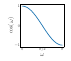

### Definition 3.6 (Distance and Metric)

Consider an inner product space $ (V, \langle \cdot, \cdot \rangle) $. Then

$$
d(x, y) := \|x - y\| = \sqrt{\langle x - y, x - y \rangle} \tag{3.21}
$$

is called the **distance** between $ x $ and $ y $ for $ x, y \in V $. If we use the dot product as the inner product, then the distance is called **Euclidean distance**.

In [6]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Custom Inner Product (Example 3.5, Equation 3.19) ---
def custom_inner_product(x, y):
    """
    Compute the custom inner product in R^2:
    <x, y> = x^T [1, -0.5; -0.5, 1] y = x_1 y_1 - 0.5 (x_1 y_2 + x_2 y_1) + x_2 y_2
    """
    if len(x) != 2 or len(y) != 2:
        raise ValueError("Vectors must be in R^2")
    x1, x2 = x
    y1, y2 = y
    return x1 * y1 - 0.5 * (x1 * y2 + x2 * y1) + x2 * y2

# --- Norm Induced by Inner Product (Equation 3.16) ---
def induced_norm(x, inner_product):
    """
    Compute the norm induced by an inner product: ||x|| = sqrt(<x, x>)
    """
    return math.sqrt(inner_product(x, x))

# --- Distance Between Vectors (Equation 3.21) ---
def distance(x, y, inner_product):
    """
    Compute the distance d(x, y) = ||x - y|| = sqrt(<x - y, x - y>)
    """
    diff = [xi - yi for xi, yi in zip(x, y)]
    return induced_norm(diff, inner_product)

# --- Verify Cauchy-Schwarz Inequality (Equation 3.17) ---
def verify_cauchy_schwarz(x, y, inner_product):
    """
    Verify |<x, y>| <= ||x|| ||y||
    """
    inner_prod = inner_product(x, y)
    norm_x = induced_norm(x, inner_product)
    norm_y = induced_norm(y, inner_product)
    left_side = abs(inner_prod)
    right_side = norm_x * norm_y
    print(f"|<x, y>| = {left_side:.2f}, ||x|| ||y|| = {right_side:.2f}")
    print(f"Cauchy-Schwarz holds: {left_side <= right_side}\n")

# --- Run the Implementation ---
# Test vector from Example 3.5
x = [1.0, 1.0]

# Another vector for testing Cauchy-Schwarz and distance
y = [2.0, -1.0]

# 1. Length of x using both inner products (Example 3.5)
print("Example 3.5: Length of x = [1, 1] using different inner products")

# Using dot product
norm_dot = induced_norm(x, dot_product)
print(f"Using dot product: ||x|| = sqrt(x^T x) = {norm_dot:.2f} (should be sqrt(2) ≈ 1.41)")

# Using custom inner product
norm_custom = induced_norm(x, custom_inner_product)
print(f"Using custom inner product: ||x|| = sqrt(<x, x>) = {norm_custom:.2f} (should be 1.00)\n")

# 2. Verify Cauchy-Schwarz Inequality
print("Verifying Cauchy-Schwarz Inequality (Equation 3.17):")
print(f"x = {x}, y = {y}")

print("With dot product:")
verify_cauchy_schwarz(x, y, dot_product)

print("With custom inner product:")
verify_cauchy_schwarz(x, y, custom_inner_product)

# 3. Compute distances
print("Distances between x and y (Equation 3.21):")
print(f"x = {x}, y = {y}")

dist_dot = distance(x, y, dot_product)
print(f"Euclidean distance (dot product): d(x, y) = {dist_dot:.2f}")

dist_custom = distance(x, y, custom_inner_product)
print(f"Distance with custom inner product: d(x, y) = {dist_custom:.2f}")

Example 3.5: Length of x = [1, 1] using different inner products
Using dot product: ||x|| = sqrt(x^T x) = 1.41 (should be sqrt(2) ≈ 1.41)
Using custom inner product: ||x|| = sqrt(<x, x>) = 1.00 (should be 1.00)

Verifying Cauchy-Schwarz Inequality (Equation 3.17):
x = [1.0, 1.0], y = [2.0, -1.0]
With dot product:
|<x, y>| = 1.00, ||x|| ||y|| = 3.16
Cauchy-Schwarz holds: True

With custom inner product:
|<x, y>| = 0.50, ||x|| ||y|| = 2.65
Cauchy-Schwarz holds: True

Distances between x and y (Equation 3.21):
x = [1.0, 1.0], y = [2.0, -1.0]
Euclidean distance (dot product): d(x, y) = 2.24
Distance with custom inner product: d(x, y) = 2.65


### Example 3.6 (Angle between Vectors)

Let us compute the angle between $ x = \begin{bmatrix} 1 \\ 1 \end{bmatrix} \in \mathbb{R}^2 $ and $ y = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \in \mathbb{R}^2 $; see Figure 3.5, where we use the dot product as the inner product. Then

$$
\cos \omega = \frac{\langle x, y \rangle}{\sqrt{\langle x, x \rangle} \sqrt{\langle y, y \rangle}} = \frac{x^\top y}{\sqrt{x^\top x} \sqrt{y^\top y}} = \frac{3}{\sqrt{10}}, \tag{3.26}
$$

and the angle between the two vectors is $ \arccos\left(\frac{3}{\sqrt{10}}\right) \approx 0.32 $ rad, which corresponds to about $ 18^\circ $.

A key feature of the inner product is that it also allows us to characterize vectors that are orthogonal.

### Definition 3.7 (Orthogonality)

Two vectors $ x $ and $ y $ are **orthogonal** if and only if $ \langle x, y \rangle = 0 $, and we write $ x \perp y $. If additionally $ \|x\| = 1 = \|y\| $, i.e., the vectors are unit vectors, then $ x $ and $ y $ are **orthonormal**.

An implication of this definition is that the 0-vector is orthogonal to every vector in the vector space.

**Remark.** Orthogonality is the generalization of the concept of perpendicularity to bilinear forms that do not have to be the dot product. In our context, geometrically, we can think of orthogonal vectors as having a right angle with respect to a specific inner product. $ \diamond $

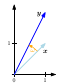

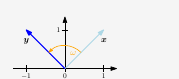

### Example 3.7 (Orthogonal Vectors)

Consider two vectors $ x = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $, $ y = \begin{bmatrix} -1 \\ 1 \end{bmatrix} \in \mathbb{R}^2 $; see Figure 3.6. We are interested in determining the angle $ \omega $ between them using two different inner products. Using the dot product as the inner product yields an angle $ \omega $ between $ x $ and $ y $ of $ 90^\circ $, such that $ x \perp y $. However, if we choose the inner product

$$
\langle x, y \rangle = x^\top \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} y, \tag{3.27}
$$

In [7]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Custom Inner Product (Example 3.7, Equation 3.27) ---
def custom_inner_product(x, y):
    """
    Compute the custom inner product in R^2:
    <x, y> = x^T [2, 0; 0, 1] y = 2 x_1 y_1 + x_2 y_2
    """
    if len(x) != 2 or len(y) != 2:
        raise ValueError("Vectors must be in R^2")
    x1, x2 = x
    y1, y2 = y
    return 2 * x1 * y1 + x2 * y2

# --- Norm Induced by Inner Product ---
def induced_norm(x, inner_product):
    """
    Compute the norm induced by an inner product: ||x|| = sqrt(<x, x>)
    """
    return math.sqrt(inner_product(x, x))

# --- Compute Angle Between Vectors ---
def compute_angle(x, y, inner_product):
    """
    Compute the angle omega between vectors x and y using the given inner product.
    cos(omega) = <x, y> / (||x|| ||y||), omega in [0, pi]
    Returns the angle in radians and degrees.
    """
    if all(xi == 0 for xi in x) or all(yi == 0 for yi in y):
        raise ValueError("Vectors must be non-zero to compute the angle")
    
    inner_prod = inner_product(x, y)
    norm_x = induced_norm(x, inner_product)
    norm_y = induced_norm(y, inner_product)
    
    cos_omega = inner_prod / (norm_x * norm_y)
    # Ensure cos_omega is in [-1, 1] to avoid numerical errors
    cos_omega = max(min(cos_omega, 1.0), -1.0)
    
    omega_rad = math.acos(cos_omega)
    omega_deg = math.degrees(omega_rad)
    return omega_rad, omega_deg

# --- Test Orthogonality ---
def are_orthogonal(x, y, inner_product):
    """
    Check if vectors x and y are orthogonal: <x, y> = 0
    """
    inner_prod = inner_product(x, y)
    return abs(inner_prod) < 1e-10  # Small threshold for floating-point comparison

# --- Run the Implementation ---
# Example 3.6: Angle between x = [1, 1] and y = [1, 2] using dot product
print("Example 3.6: Angle between x = [1, 1] and y = [1, 2] using dot product")
x1 = [1.0, 1.0]
y1 = [1.0, 2.0]
omega_rad, omega_deg = compute_angle(x1, y1, dot_product)
print(f"cos(ω) = {dot_product(x1, y1) / (induced_norm(x1, dot_product) * induced_norm(y1, dot_product)):.3f}")
print(f"Angle: {omega_rad:.2f} radians, {omega_deg:.1f} degrees (should be ~0.32 rad, 18°)\n")

# Example 3.7: Orthogonality of x = [1, 1] and y = [-1, 1] with different inner products
print("Example 3.7: Orthogonality of x = [1, 1] and y = [-1, 1]")
x2 = [1.0, 1.0]
y2 = [-1.0, 1.0]

# Using dot product
print("Using dot product:")
inner_prod_dot = dot_product(x2, y2)
is_ortho_dot = are_orthogonal(x2, y2, dot_product)
omega_rad_dot, omega_deg_dot = compute_angle(x2, y2, dot_product)
print(f"<x, y> = {inner_prod_dot:.2f}")
print(f"Orthogonal: {is_ortho_dot} (should be True, angle should be 90°)")
print(f"Angle: {omega_rad_dot:.2f} radians, {omega_deg_dot:.1f} degrees\n")

# Using custom inner product
print("Using custom inner product ([2, 0; 0, 1]):")
inner_prod_custom = custom_inner_product(x2, y2)
is_ortho_custom = are_orthogonal(x2, y2, custom_inner_product)
omega_rad_custom, omega_deg_custom = compute_angle(x2, y2, custom_inner_product)
print(f"<x, y> = {inner_prod_custom:.2f}")
print(f"Orthogonal: {is_ortho_custom} (should be False)")
print(f"Angle: {omega_rad_custom:.2f} radians, {omega_deg_custom:.1f} degrees")

Example 3.6: Angle between x = [1, 1] and y = [1, 2] using dot product
cos(ω) = 0.949
Angle: 0.32 radians, 18.4 degrees (should be ~0.32 rad, 18°)

Example 3.7: Orthogonality of x = [1, 1] and y = [-1, 1]
Using dot product:
<x, y> = 0.00
Orthogonal: True (should be True, angle should be 90°)
Angle: 1.57 radians, 90.0 degrees

Using custom inner product ([2, 0; 0, 1]):
<x, y> = -1.00
Orthogonal: False (should be False)
Angle: 1.91 radians, 109.5 degrees


we get that the angle $ \omega $ between $ x $ and $ y $ is given by

$$
\cos \omega = \frac{\langle x, y \rangle}{\|x\| \|y\|} = \frac{-1}{3} \implies \omega \approx 1.91 \, \text{rad} \approx 109.5^\circ, \tag{3.28}
$$

and $ x $ and $ y $ are not orthogonal. Therefore, vectors that are orthogonal with respect to one inner product do not have to be orthogonal with respect to a different inner product.

### Definition 3.8 (Orthogonal Matrix)

A square matrix $ A \in \mathbb{R}^{n \times n} $ is an **orthogonal matrix** if and only if its columns are orthonormal so that

$$
A A^\top = I = A^\top A, \tag{3.29}
$$

which implies that

$$
A^{-1} = A^\top, \tag{3.30}
$$

i.e., the inverse is obtained by simply transposing the matrix.

Transformations by orthogonal matrices are special because the length of a vector $ x $ is not changed when transforming it using an orthogonal matrix $ A $. For the dot product, we obtain

$$
\|A x\|^2 = (A x)^\top (A x) = x^\top A^\top A x = x^\top I x = x^\top x = \|x\|^2. \tag{3.31}
$$

Moreover, the angle between any two vectors $ x, y $, as measured by their inner product, is also unchanged when transforming both of them using an orthogonal matrix $ A $. Assuming the dot product as the inner product, the angle of the images $ A x $ and $ A y $ is given as

$$
\cos \omega = \frac{(A x)^\top (A y)}{\|A x\| \|A y\|} = \frac{x^\top A^\top A y}{\sqrt{x^\top A^\top A x} \sqrt{y^\top A^\top A y}} = \frac{x^\top y}{\|x\| \|y\|}, \tag{3.32}
$$

which gives exactly the angle between $ x $ and $ y $. This means that orthogonal matrices $ A $ with $ A^\top = A^{-1} $ preserve both angles and distances. It turns out that orthogonal matrices define transformations that are rotations (with the possibility of flips). In Section 3.9, we will discuss more details about rotations.

## 3.5 Orthonormal Basis

In Section 2.6.1, we characterized properties of basis vectors and found that in an $ n $-dimensional vector space, we need $ n $ basis vectors, i.e., $ n $ vectors that are linearly independent. In Sections 3.3 and 3.4, we used inner products to compute the length of vectors and the angle between vectors. In the following, we will discuss the special case where the basis vectors are orthogonal to each other and where the length of each basis vector is 1. We will call this basis then an **orthonormal basis**.

In [8]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Custom Inner Product (Example 3.7, Equation 3.27) ---
def custom_inner_product(x, y):
    """
    Compute the custom inner product in R^2:
    <x, y> = x^T [2, 0; 0, 1] y = 2 x_1 y_1 + x_2 y_2
    """
    if len(x) != 2 or len(y) != 2:
        raise ValueError("Vectors must be in R^2")
    x1, x2 = x
    y1, y2 = y
    return 2 * x1 * y1 + x2 * y2

# --- Norm Induced by Inner Product ---
def induced_norm(x, inner_product):
    """
    Compute the norm induced by an inner product: ||x|| = sqrt(<x, x>)
    """
    return math.sqrt(inner_product(x, x))

# --- Compute Angle Between Vectors ---
def compute_angle(x, y, inner_product):
    """
    Compute the angle omega between vectors x and y using the given inner product.
    cos(omega) = <x, y> / (||x|| ||y||), omega in [0, pi]
    Returns the angle in radians and degrees.
    """
    if all(xi == 0 for xi in x) or all(yi == 0 for yi in y):
        raise ValueError("Vectors must be non-zero to compute the angle")
    
    inner_prod = inner_product(x, y)
    norm_x = induced_norm(x, inner_product)
    norm_y = induced_norm(y, inner_product)
    
    cos_omega = inner_prod / (norm_x * norm_y)
    # Ensure cos_omega is in [-1, 1] to avoid numerical errors
    cos_omega = max(min(cos_omega, 1.0), -1.0)
    
    omega_rad = math.acos(cos_omega)
    omega_deg = math.degrees(omega_rad)
    return omega_rad, omega_deg

# --- Matrix Operations ---
def matrix_multiply(A, B):
    """
    Multiply two matrices A and B.
    """
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])
    if cols_A != rows_B:
        raise ValueError("Matrix dimensions incompatible for multiplication")
    
    result = [[0.0 for _ in range(cols_B)] for _ in range(rows_A)]
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
    return result

def matrix_transpose(A):
    """
    Compute the transpose of a matrix A.
    """
    rows, cols = len(A), len(A[0])
    return [[A[j][i] for j in range(rows)] for i in range(cols)]

def matrix_vector_multiply(A, x):
    """
    Multiply a matrix A by a vector x.
    """
    rows, cols = len(A), len(A[0])
    if cols != len(x):
        raise ValueError("Matrix and vector dimensions incompatible")
    
    result = [0.0 for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            result[i] += A[i][j] * x[j]
    return result

# --- Check if Matrix is Orthogonal (Definition 3.8) ---
def is_orthogonal_matrix(A):
    """
    Check if a matrix A is orthogonal: A A^T = I.
    """
    A_T = matrix_transpose(A)
    A_AT = matrix_multiply(A, A_T)
    n = len(A)
    I = [[1.0 if i == j else 0.0 for j in range(n)] for i in range(n)]
    
    # Check if A A^T = I (within floating-point tolerance)
    for i in range(n):
        for j in range(n):
            if abs(A_AT[i][j] - I[i][j]) > 1e-10:
                return False
    return True

# --- Verify Orthogonal Matrix Properties (Equations 3.31 and 3.32) ---
def verify_orthogonal_properties(A, x, y):
    """
    Verify that an orthogonal matrix A preserves lengths and angles.
    - Length: ||Ax|| = ||x|| (Equation 3.31)
    - Angle: cos(omega) between Ax and Ay equals cos(omega) between x and y (Equation 3.32)
    Uses the dot product as the inner product.
    """
    # Length preservation
    Ax = matrix_vector_multiply(A, x)
    norm_x = induced_norm(x, dot_product)
    norm_Ax = induced_norm(Ax, dot_product)
    print(f"Length Preservation (Equation 3.31):")
    print(f"||x|| = {norm_x:.2f}, ||Ax|| = {norm_Ax:.2f}")
    print(f"Length preserved: {abs(norm_x - norm_Ax) < 1e-10}\n")

    # Angle preservation
    Ay = matrix_vector_multiply(A, y)
    omega_xy_rad, _ = compute_angle(x, y, dot_product)
    omega_AxAy_rad, _ = compute_angle(Ax, Ay, dot_product)
    print(f"Angle Preservation (Equation 3.32):")
    print(f"Angle between x and y: {omega_xy_rad:.2f} radians")
    print(f"Angle between Ax and Ay: {omega_AxAy_rad:.2f} radians")
    print(f"Angle preserved: {abs(omega_xy_rad - omega_AxAy_rad) < 1e-10}\n")

# --- Check if Vectors Form an Orthonormal Basis (Section 3.5) ---
def is_orthonormal_basis(basis_vectors, inner_product):
    """
    Check if a set of vectors forms an orthonormal basis:
    - All pairs are orthogonal: <v_i, v_j> = 0 for i != j
    - All vectors have unit norm: ||v_i|| = 1
    """
    n = len(basis_vectors)
    
    # Check unit norms
    for i in range(n):
        norm = induced_norm(basis_vectors[i], inner_product)
        if abs(norm - 1.0) > 1e-10:
            print(f"Vector {basis_vectors[i]} has norm {norm:.2f}, not 1")
            return False
    
    # Check orthogonality
    for i in range(n):
        for j in range(i + 1, n):
            inner_prod = inner_product(basis_vectors[i], basis_vectors[j])
            if abs(inner_prod) > 1e-10:
                print(f"Vectors {basis_vectors[i]} and {basis_vectors[j]} are not orthogonal: <v_i, v_j> = {inner_prod:.2f}")
                return False
    return True

# --- Run the Implementation ---
# Continuation of Example 3.7: Angle between x = [1, 1] and y = [-1, 1] with custom inner product
print("Example 3.7 (Continued): Angle between x = [1, 1] and y = [-1, 1] with custom inner product")
x = [1.0, 1.0]
y = [-1.0, 1.0]
omega_rad, omega_deg = compute_angle(x, y, custom_inner_product)
print(f"cos(ω) = {custom_inner_product(x, y) / (induced_norm(x, custom_inner_product) * induced_norm(y, custom_inner_product)):.2f}")
print(f"Angle: {omega_rad:.2f} radians, {omega_deg:.1f} degrees (should be ~1.91 rad, 109.5°)\n")

# Orthogonal Matrix Test (Definition 3.8)
# Example: A 2x2 rotation matrix by 45 degrees
theta = math.pi / 4  # 45 degrees
A = [
    [math.cos(theta), -math.sin(theta)],
    [math.sin(theta), math.cos(theta)]
]
print("Orthogonal Matrix Test (Definition 3.8):")
print(f"A = {A}")
print(f"Is orthogonal: {is_orthogonal_matrix(A)}\n")

# Verify orthogonal matrix properties
x_test = [1.0, 2.0]
y_test = [2.0, -1.0]
verify_orthogonal_properties(A, x_test, y_test)

# Orthonormal Basis Test (Section 3.5)
# Example: Standard basis in R^2 and a rotated orthonormal basis
standard_basis = [[1.0, 0.0], [0.0, 1.0]]
rotated_basis = [[math.cos(theta), math.sin(theta)], [-math.sin(theta), math.cos(theta)]]
print("Orthonormal Basis Test (Section 3.5):")
print("Standard basis in R^2:", standard_basis)
print(f"Is orthonormal (dot product): {is_orthonormal_basis(standard_basis, dot_product)}\n")
print("Rotated basis in R^2:", rotated_basis)
print(f"Is orthonormal (dot product): {is_orthonormal_basis(rotated_basis, dot_product)}")

Example 3.7 (Continued): Angle between x = [1, 1] and y = [-1, 1] with custom inner product
cos(ω) = -0.33
Angle: 1.91 radians, 109.5 degrees (should be ~1.91 rad, 109.5°)

Orthogonal Matrix Test (Definition 3.8):
A = [[0.7071067811865476, -0.7071067811865475], [0.7071067811865475, 0.7071067811865476]]
Is orthogonal: True

Length Preservation (Equation 3.31):
||x|| = 2.24, ||Ax|| = 2.24
Length preserved: True

Angle Preservation (Equation 3.32):
Angle between x and y: 1.57 radians
Angle between Ax and Ay: 1.57 radians
Angle preserved: True

Orthonormal Basis Test (Section 3.5):
Standard basis in R^2: [[1.0, 0.0], [0.0, 1.0]]
Is orthonormal (dot product): True

Rotated basis in R^2: [[0.7071067811865476, 0.7071067811865475], [-0.7071067811865475, 0.7071067811865476]]
Is orthonormal (dot product): True
